1. Import Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present_20250302.csv")

# Afficher les premières lignes
df.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.61220,...,1047120.0,2797857.0,15998.0,Compliant,No Issue,3572773.0,1599760.0,332.1,3.76,False
1,2,2023,PARAMOUNT HOTEL,NonResidential,659000220,724 PINE ST,SEATTLE,WA,98101,47.61307,...,786237.0,NaN,38570.0,Compliant,No Issue,2682640.0,3856970.0,220.0,2.49,False
2,3,2023,WESTIN HOTEL (Parent Building),NonResidential,659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,...,11121130.0,20494222.0,59006.0,Compliant,No Issue,37945296.0,5900600.0,2192.8,2.89,False
3,5,2023,HOTEL MAX,NonResidential,659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,...,780180.0,1248616.0,11231.0,Compliant,"Missing EUI, Incomplete Fuel Data",2661973.0,1123100.0,176.1,2.87,False
4,8,2023,WARWICK SEATTLE HOTEL,NonResidential,659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,...,1401668.0,NaN,80926.0,Compliant,No Issue,4782491.0,8092580.0,456.6,4.02,False


2. Observe Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Vérification des dimensions du dataset 
print(f"Shape du dataset (nombre de lignes, nombre de colonnes) : {df.shape}")

# Vérification des noms des colonnes 
print("\nNoms des colonnes du dataset :")
print(df.columns.tolist())  # Affiche la liste des colonnes pour vérifier leur format

#  Aperçu rapide des données 
print("\n🔍 Aperçu des premières lignes :")
print(df.head())  # Afficher les 5 premières lignes

print("\n🔍 Aperçu des dernières lignes :")
print(df.tail())  # Afficher les 5 dernières lignes

print("\n🔍 Échantillon aléatoire de 5 lignes :")
print(df.sample(5))  # Afficher un échantillon aléatoire de 5 lignes

#  Informations générales sur les variables 
print("\n📌 Informations générales sur le dataset :")
df.info()  # Affiche le type des colonnes, le nombre de valeurs non nulles et la mémoire utilisée

#  Vérification des types de données 
print("\n📌 Types des données :")
print(df.dtypes)  # Vérifier si certaines colonnes doivent être converties (ex: dates, nombres mal formatés)

#  Vérification des valeurs manquantes 
print("\n⚠️ Nombre de valeurs manquantes par colonne :")
missing_values = df.isnull().sum()  # Compter les valeurs nulles par colonne
missing_values = missing_values[missing_values > 0]  # Filtrer uniquement les colonnes qui ont des valeurs manquantes
print(missing_values)


Shape du dataset (nombre de lignes, nombre de colonnes) : (30616, 46)

Noms des colonnes du dataset :
['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType', 'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode', 'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuildings', 'PropertyGFAParking', 'SelfReportGFATotal', 'SelfReportGFABuildings', 'SelfReportParking', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'EPAPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)', 'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmi

Le dataset contient 30,616 lignes et 46 colonnes.
Plusieurs colonnes ont des valeurs manquantes, notamment :
- LargestPropertyUseTypeGFA (19,092 valeurs manquantes)
- SecondLargestPropertyUseTypeGFA (22,182 valeurs manquantes)
- Electricity(kWh), SteamUse(kBtu), NaturalGas(therms) (plusieurs milliers de valeurs manquantes)
- TotalGHGEmissions, GHGEmissionsIntensity (≈ 450 valeurs manquantes)

- Pour les colonnes très importantes (TotalGHGEmissions, GHGEmissionsIntensity...), on les traite maintenant.
- Pour les colonnes catégorielles (LargestPropertyUseTypeGFA, SecondLargestPropertyUseType...), on attend.

2.2. Observe data (cleaning missing values)


📊 Pourcentage de valeurs manquantes par colonne avant traitement :
Series([], dtype: float64)

🗑️ Colonnes supprimées (0): []
🔄 Nouvelle shape du dataset après suppression : (30616, 43)

✅ Imputation des valeurs numériques avec la médiane terminée.

✅ Imputation des valeurs catégoriques terminée.

🔍 Vérification finale des valeurs manquantes après traitement :
✅ Aucune valeur manquante restante.


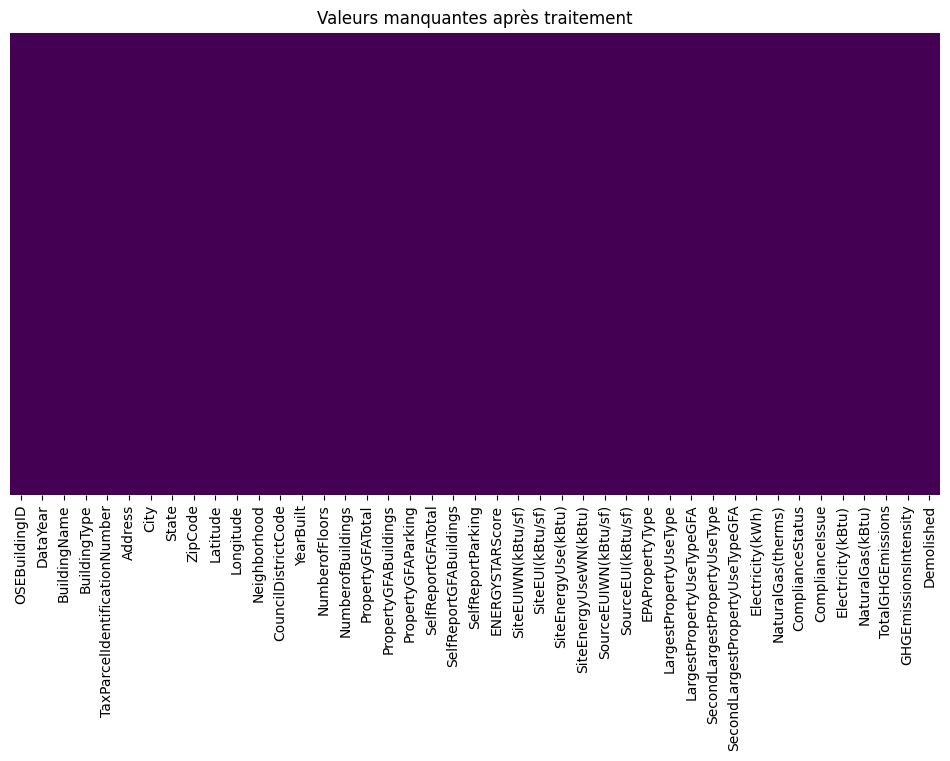

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Vérification des valeurs manquantes avant traitement
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\n📊 Pourcentage de valeurs manquantes par colonne avant traitement :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# 2️⃣ Suppression des colonnes avec plus de 70% de valeurs manquantes
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n🗑️ Colonnes supprimées ({len(cols_to_drop)}): {list(cols_to_drop)}")
print(f"🔄 Nouvelle shape du dataset après suppression : {df.shape}")

# 3️⃣ Imputation des valeurs numériques manquantes (médiane)
num_cols = df.select_dtypes(include=['number']).columns  # Sélection automatique des colonnes numériques
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("\n✅ Imputation des valeurs numériques avec la médiane terminée.")

# 4️⃣ Imputation des valeurs catégoriques manquantes (remplacement par 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns  # Sélection automatique des colonnes catégoriques
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n✅ Imputation des valeurs catégoriques terminée.")

# 5️⃣ Vérification finale des valeurs manquantes
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print("\n🔍 Vérification finale des valeurs manquantes après traitement :")
if remaining_missing.empty:
    print("✅ Aucune valeur manquante restante.")
else:
    print(remaining_missing)

# 📊 Visualisation des valeurs manquantes après traitement
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs manquantes après traitement")
plt.show()

🔍 Résultats obtenus :
✅ Aucune colonne n’avait plus de 70% de valeurs manquantes, donc aucune suppression nécessaire.
✅ Les valeurs numériques manquantes ont été remplacées par leur médiane.
✅ Les valeurs catégoriques manquantes ont été remplacées par "Unknown".
✅ Vérification finale : aucune valeur manquante restante dans le dataset.

📊 Interprétation :

Le dataset est maintenant propre, aucune information essentielle n’a été supprimée.
L’imputation par la médiane permet d’éviter de fausser les tendances des variables numériques.
L’utilisation de "Unknown" pour les catégories assure qu’on ne crée pas de biais en attribuant des valeurs incorrectes.

3. Univariate Analysis


📊 Statistiques descriptives des variables numériques :
       OSEBuildingID      DataYear       ZipCode      Latitude     Longitude  \
count   30616.000000  30616.000000  30616.000000  30616.000000  30616.000000   
mean    22789.211687   2019.117357  98116.508329     47.624879   -122.334954   
std     13437.691828      2.574472     16.707490      0.047130      0.027065   
min         1.000000   2015.000000  98101.000000     47.499170   -122.414250   
25%     20198.000000   2017.000000  98105.000000     47.601345   -122.350910   
50%     23420.000000   2019.000000  98112.000000     47.619270   -122.332480   
75%     26558.000000   2021.000000  98122.000000     47.657530   -122.319200   
max     50956.000000   2023.000000  98199.000000     47.733870   -122.258640   

       CouncilDistrictCode     YearBuilt  NumberofFloors  NumberofBuildings  \
count          30616.00000  30616.000000    30616.000000       30616.000000   
mean               4.22240   1971.992063        5.016821         

<Figure size 1500x1200 with 0 Axes>

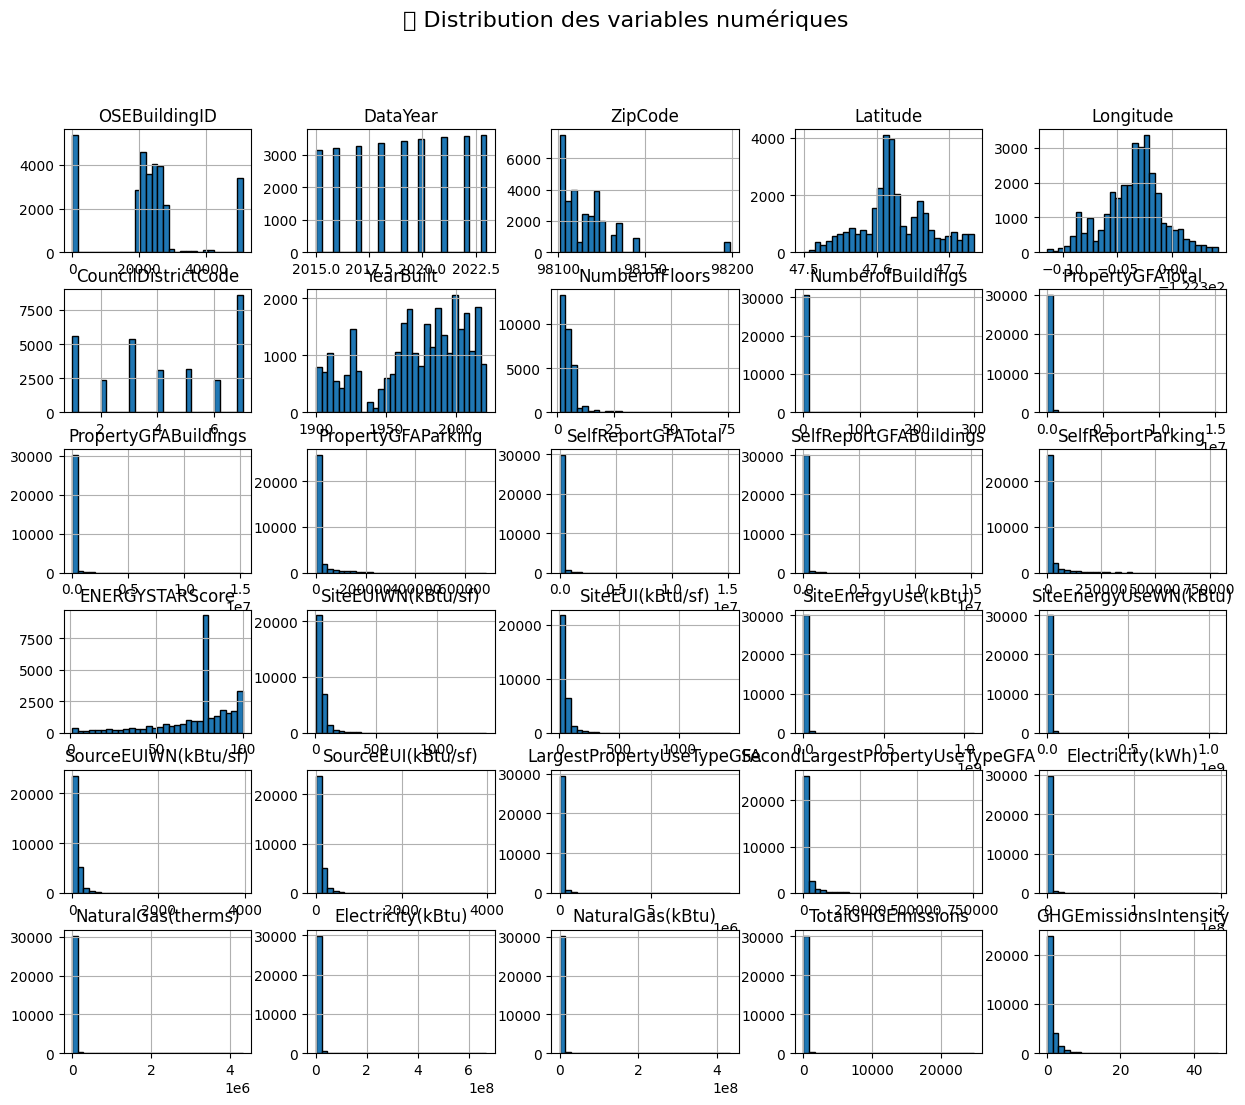


📌 Top 10 des valeurs uniques pour LargestPropertyUseType :
LargestPropertyUseType
Multifamily Housing           16294
Office                         4460
Non-Refrigerated Warehouse     1431
K-12 School                    1205
Retail Store                    770
Hotel                           703
Worship Facility                584
Other                           576
Distribution Center             419
Medical Office                  411
Name: count, dtype: int64

📌 Top 10 des valeurs uniques pour SecondLargestPropertyUseType :
SecondLargestPropertyUseType
Unknown                       13102
Parking                       11111
Office                         1783
Retail Store                   1285
Restaurant                      454
Other                           439
Non-Refrigerated Warehouse      285
Multifamily Housing             178
Medical Office                  120
Supermarket/Grocery Store       117
Name: count, dtype: int64


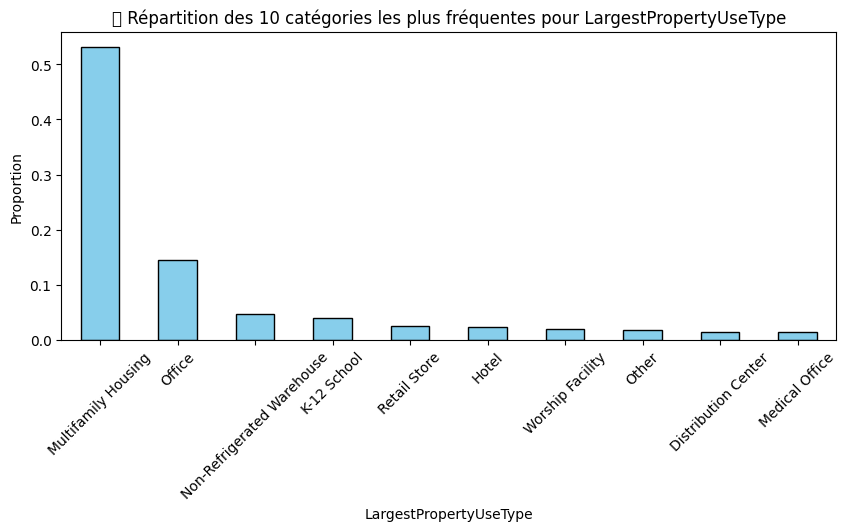

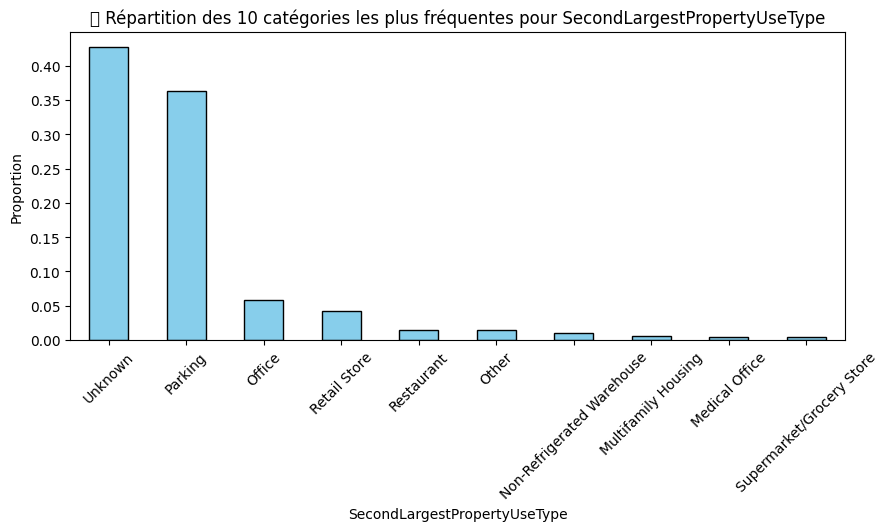

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# 📌 1. Statistiques descriptives des variables numériques
print("\n📊 Statistiques descriptives des variables numériques :")
print(df.describe())

# 📌 2. Distribution des variables numériques (Histogrammes)
plt.figure(figsize=(15, 12))
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("📊 Distribution des variables numériques", fontsize=16)
plt.show()


# 📌 3. Vérification des valeurs uniques des colonnes catégoriques
cat_cols = ['LargestPropertyUseType', 'SecondLargestPropertyUseType']

for col in cat_cols:
    print(f"\n📌 Top 10 des valeurs uniques pour {col} :")
    print(df[col].value_counts().head(10))

# 📌 4. Visualisation des catégories les plus fréquentes
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"📊 Répartition des 10 catégories les plus fréquentes pour {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()


📌 Statistiques descriptives

🔍 Résultats obtenus :
✅ Les variables comme TotalGHGEmissions, GHGEmissionsIntensity, et SiteEnergyUse(kBtu) montrent des valeurs très élevées, indiquant une grande variabilité entre les bâtiments.
✅ Certaines variables contiennent des valeurs nulles (0), notamment Electricity(kWh), NaturalGas(kBtu), ENERGYSTARScore, ce qui peut signaler des bâtiments non mesurés ou sans consommation énergétique.
✅ La variable DataYear est uniformément répartie entre 2015 et 2023, ce qui assure que les données couvrent bien toute la période.

📊 Interprétation :

Les écarts importants entre les valeurs minimales et maximales suggèrent des outliers potentiels.
Certaines valeurs nulles (0) peuvent nécessiter une analyse plus approfondie pour voir s’il s’agit d’erreurs ou de cas réels.

📌 Distribution des variables numériques
🔍 Résultats obtenus :
✅ La plupart des variables sont fortement asymétriques, avec une majorité de bâtiments consommant peu d’énergie et quelques bâtiments ayant des consommations très élevées.
✅ Latitude et Longitude montrent une répartition homogène, ce qui est un bon indicateur d’un échantillon représentatif de bâtiments.

📊 Interprétation :

Les variables énergétiques ont une répartition déséquilibrée, ce qui pourrait nécessiter une transformation logarithmique pour faciliter l’analyse.
La distribution des bâtiments est cohérente géographiquement, aucun biais évident lié à une région spécifique.

📌 Répartition des catégories (LargestPropertyUseType et SecondLargestPropertyUseType)
🔍 Résultats obtenus :
✅ Multifamily Housing représente plus de 50% des bâtiments, suivi des bureaux (Office) et entrepôts (Non-Refrigerated Warehouse).
✅ 40% des bâtiments n'ont pas de SecondLargestPropertyUseType renseigné (Unknown).
✅ Parking est la seconde catégorie d’usage la plus fréquente après "Unknown", ce qui est logique car la plupart des bâtiments ont un espace de stationnement.

📊 Interprétation :

La forte dominance de Multifamily Housing pourrait biaiser l’analyse, nécessitant une segmentation par type de bâtiment.
Les valeurs Unknown doivent être prises en compte avec prudence, car elles pourraient cacher des tendances importantes.
Regrouper les catégories sous-représentées dans "Other" pourrait être utile pour éviter d’avoir trop de classes rares.

4. Bi-variate analysis

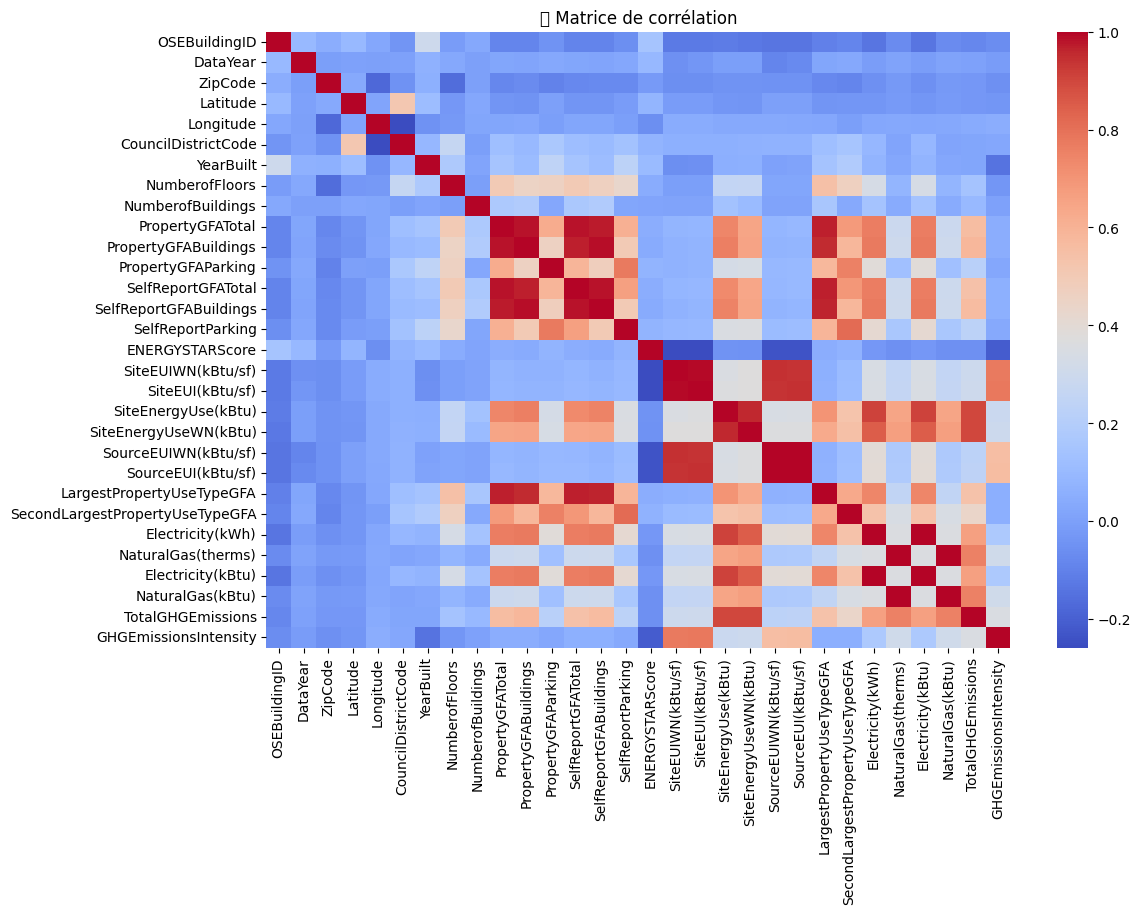

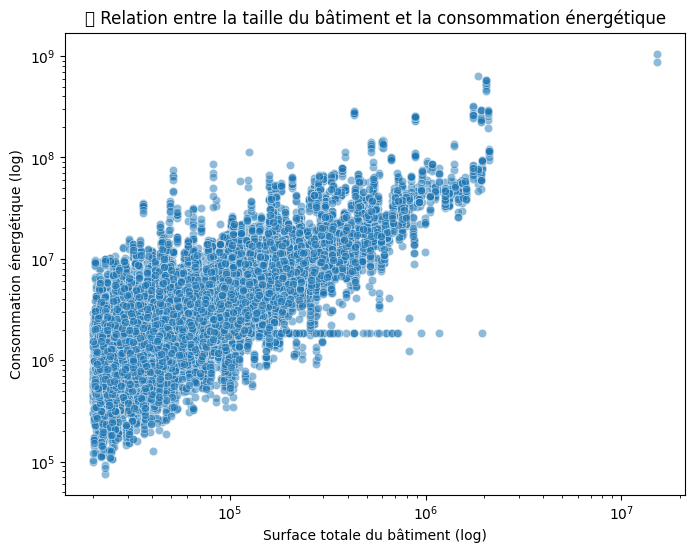

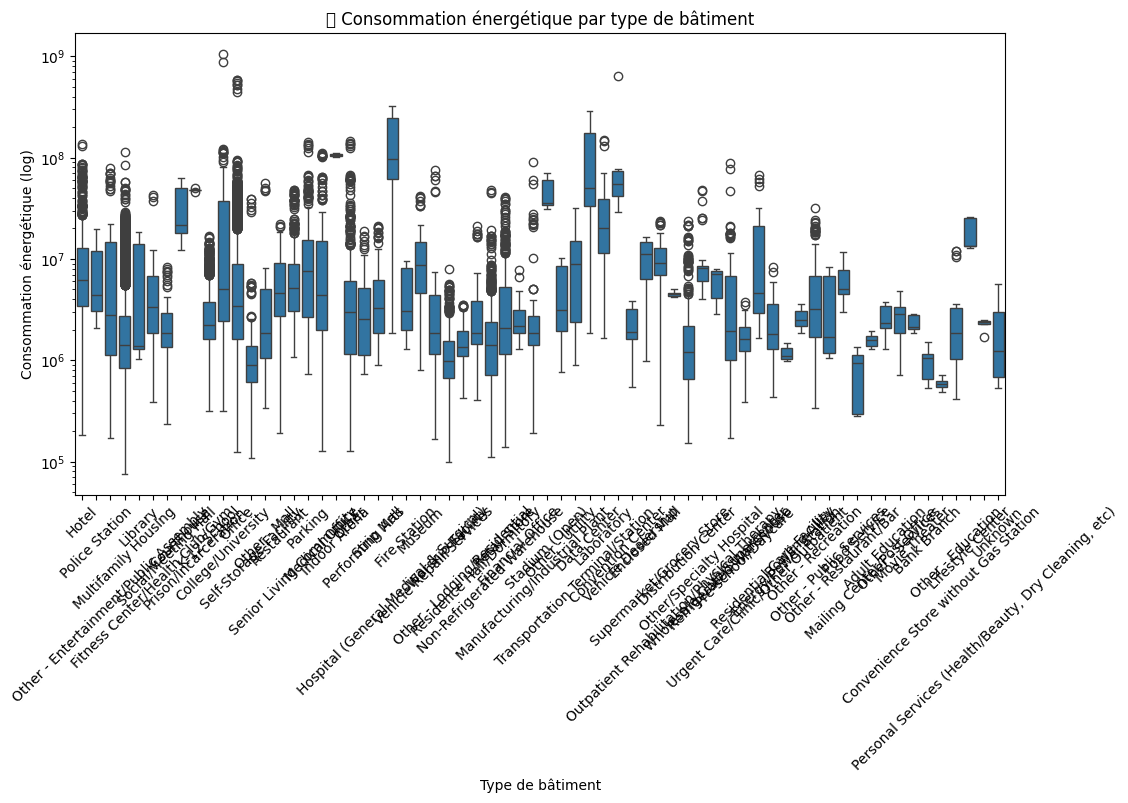

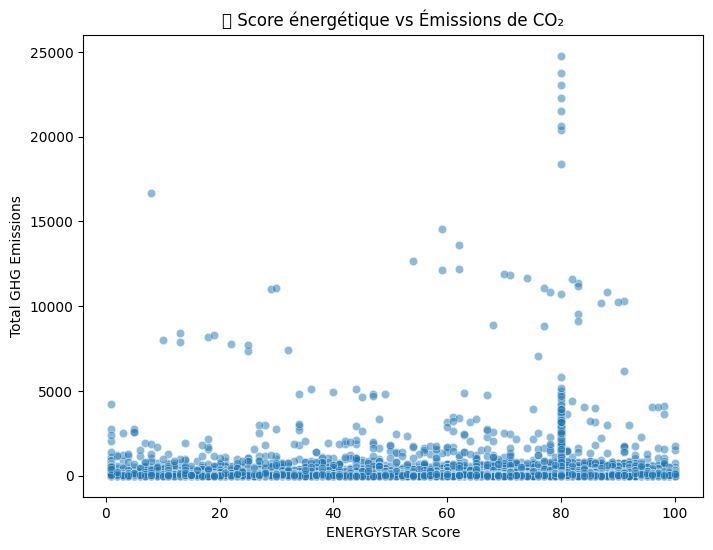

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# 📌 1️⃣ Matrice de corrélation mise à jour (sans colonnes textuelles)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("📊 Matrice de corrélation")
plt.show()


# 📌 2️⃣ Relation entre la taille du bâtiment et la consommation énergétique
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', alpha=0.5)
plt.xscale('log')  # Transformation logarithmique pour mieux visualiser
plt.yscale('log')
plt.title("📊 Relation entre la taille du bâtiment et la consommation énergétique")
plt.xlabel("Surface totale du bâtiment (log)")
plt.ylabel("Consommation énergétique (log)")
plt.show()

# 📌 3️⃣ Analyse de la consommation énergétique par type de bâtiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='LargestPropertyUseType', y='SiteEnergyUse(kBtu)')
plt.yscale('log')  # Transformation logarithmique pour éviter l'effet des valeurs extrêmes
plt.xticks(rotation=45)
plt.title("📊 Consommation énergétique par type de bâtiment")
plt.xlabel("Type de bâtiment")
plt.ylabel("Consommation énergétique (log)")
plt.show()

# 📌 4️⃣ Influence du score énergétique sur les émissions de CO₂
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ENERGYSTARScore', y='TotalGHGEmissions', alpha=0.5)
plt.title("📊 Score énergétique vs Émissions de CO₂")
plt.xlabel("ENERGYSTAR Score")
plt.ylabel("Total GHG Emissions")
plt.show()

1️⃣ Matrice de corrélation

🔍 Résultats observés :

Certaines variables montrent une forte corrélation positive (en rouge foncé), notamment :
- PropertyGFATotal et SiteEnergyUse(kBtu) ➝ Plus un bâtiment est grand, plus il consomme d’énergie.
- SiteEnergyUse(kBtu) et TotalGHGEmissions ➝ Plus la consommation d’énergie est élevée, plus les émissions de GES sont importantes.
- Electricity(kWh), NaturalGas(kBtu), et TotalGHGEmissions ➝ L’énergie consommée (électricité + gaz) est un bon indicateur des émissions de CO₂.
Certaines corrélations sont faibles ou nulles (bleu clair), ce qui signifie que ces variables n’ont pas d’impact direct entre elles.

📊 Interprétation :

- Les bâtiments plus grands consomment logiquement plus d’énergie et émettent plus de CO₂.
- Les émissions de gaz à effet de serre (TotalGHGEmissions) sont fortement influencées par l’énergie consommée.
- Les variables comme Latitude et Longitude n’ont pas d’impact significatif sur la consommation énergétique (ce qui est logique, sauf en cas de climats extrêmes).

2️⃣ Relation entre la taille du bâtiment et la consommation énergétique

🔍 Résultats observés :

- Corrélation positive claire : Plus un bâtiment est grand, plus il consomme d’énergie.
- Certains bâtiments consomment bien plus que d’autres de taille équivalente ➝ Indication possible d’inefficacité énergétique.
- Présence de points isolés en haut à droite ➝ Des outliers qui nécessitent une analyse plus approfondie.

📊 Interprétation :

- Les grands bâtiments ont une forte consommation énergétique, mais certains consomment beaucoup plus que la moyenne - Ils pourraient être moins efficaces énergétiquement.
- Une normalisation de la consommation énergétique en fonction de la taille du bâtiment pourrait être utile (exemple : consommation par m²).

3️⃣ Consommation énergétique par type de bâtiment

🔍 Résultats observés :

- Grande variabilité selon le type de bâtiment :
- Les hôpitaux, hôtels et universités consomment beaucoup plus que les logements multifamiliaux.
- Les parkings et les petits commerces consomment très peu (ce qui est logique).
- Des valeurs extrêmes (outliers) sont visibles dans plusieurs catégories.

📊 Interprétation :

- Les bâtiments nécessitant des équipements énergivores (climatisation, chauffage, machines lourdes) consomment bien plus d’énergie.
- Les logements consomment relativement peu comparés aux bureaux ou hôpitaux, ce qui est logique vu leur usage.
- Certains bâtiments d’un même type consomment beaucoup plus que d’autres ➝ Besoin d’analyser pourquoi (efficacité énergétique, isolation, équipements ?).

4️⃣ Score énergétique (ENERGYSTAR) vs Émissions de CO₂

🔍 Résultats observés :

- Aucune tendance évidente entre le score ENERGY STAR et les émissions de CO₂.
- Beaucoup de points bas, mais aussi des outliers à des scores élevés.
- Certains bâtiments avec un bon score (80+) émettent pourtant beaucoup de CO₂.

📊 Interprétation :

- Le score ENERGY STAR ne semble pas être un indicateur fiable des émissions de CO₂.
- Certains bâtiments avec un score élevé ont toujours une consommation d’énergie élevée, ce qui suggère que d’autres facteurs (isolation, source d’énergie utilisée) jouent un rôle.
- Il pourrait être intéressant d’analyser quels critères influencent réellement ce score.